# MIS 587 Assigment 3

Author: Rohith Kumar Sajja

Importing required libraries

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Loading the dataset from the given URL

In [117]:
data = pd.read_csv('https://raw.githubusercontent.com/liuhoward/teaching/master/business_intelligence/winequality-white.csv', sep = ';')

View data in brief

In [118]:
# Extracts top 5 rows in the pandas data frame

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 1. Data Exploration

## 1.1 Computing mean, standard deviation, min, max and percentiles for each of the attributes

In [119]:
# Using the describe() function from pandas library
data.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


View different columns in the data frame

In [120]:
#Extract column names in the data frame

columns = data.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## 1.2.1 Generating a histogram for each of the columns in the data frame using hist() function from pandas library

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a297edb90>,
      dtype=object)

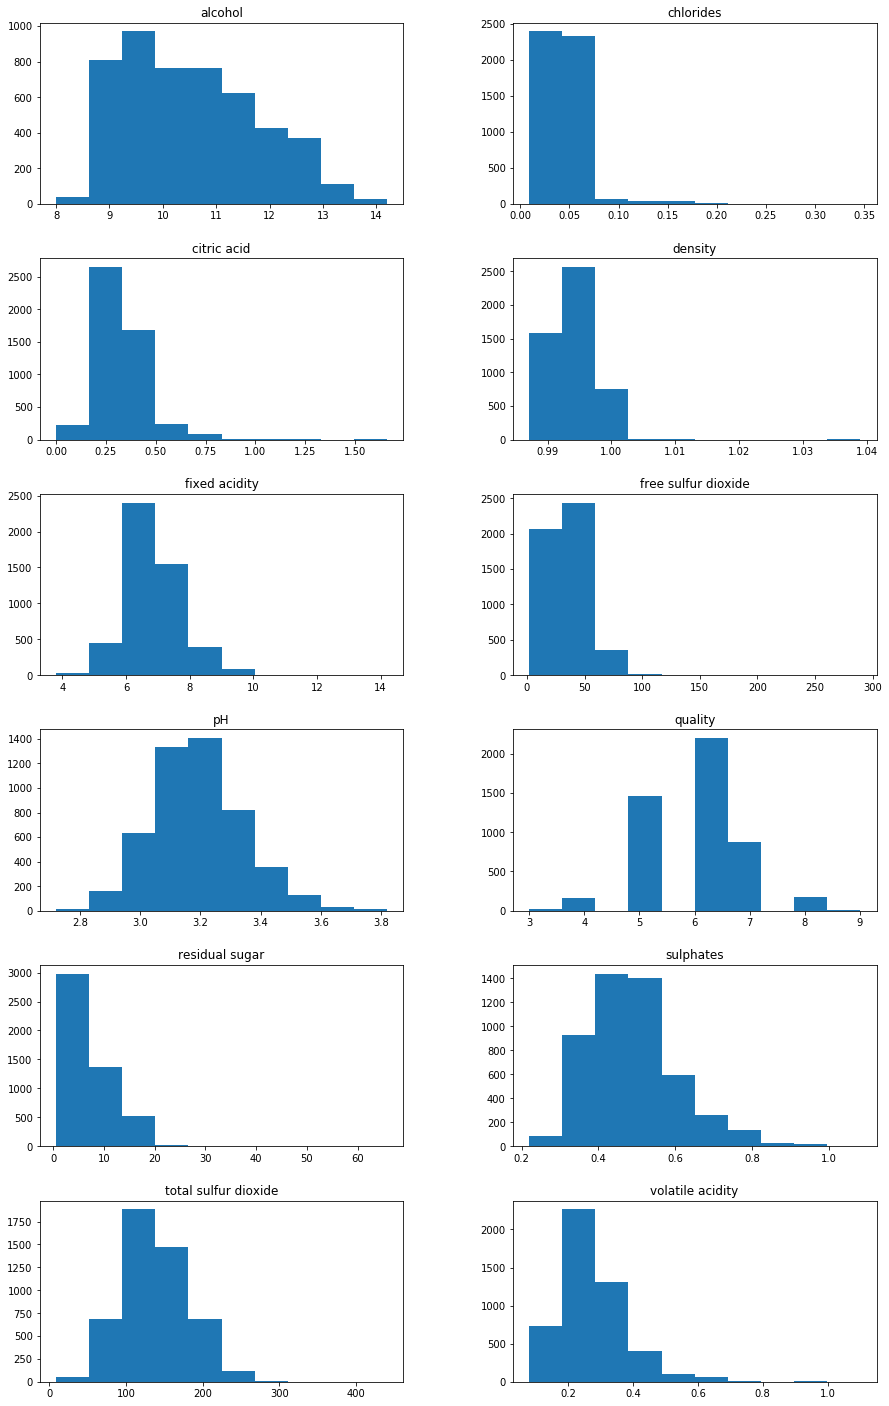

In [121]:
# Generating histogram for each attribute

data.hist(figsize = (15,25), layout = (6,2), grid = False)

## 1.2.2 Iterating through each column of the data frame and generating a box plot correspondingly

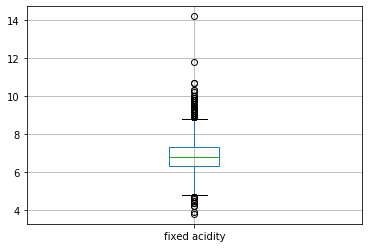

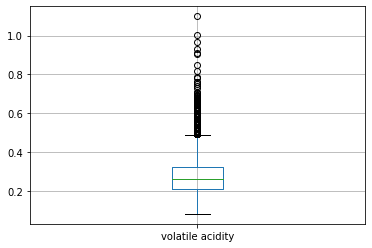

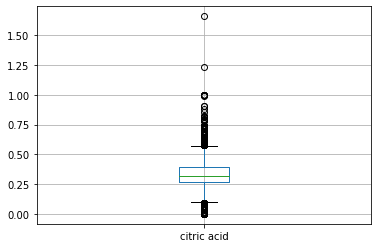

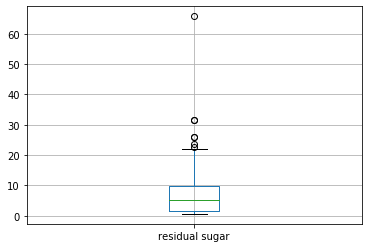

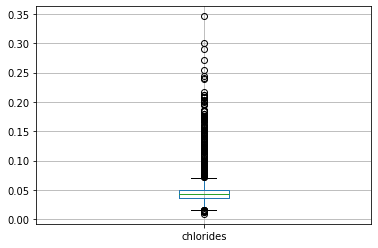

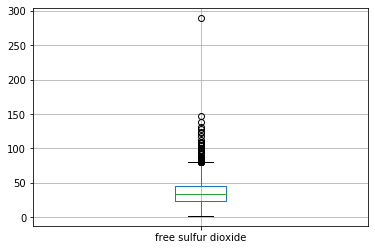

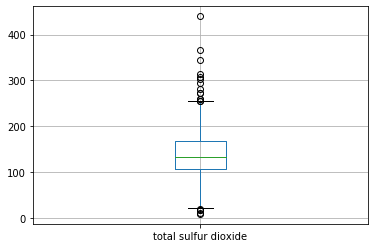

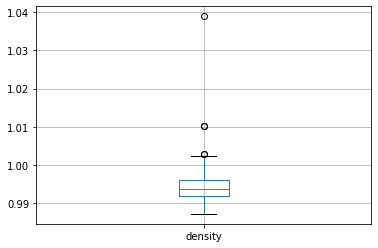

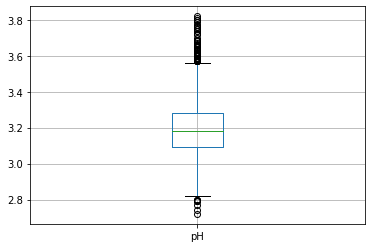

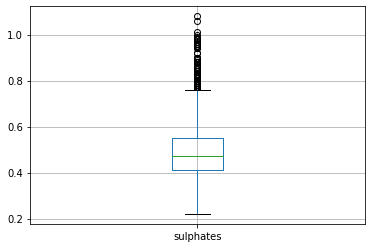

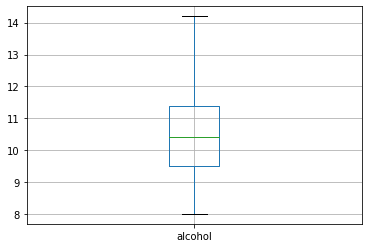

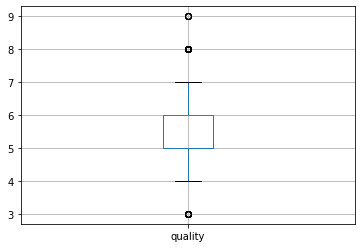

In [122]:
columns = data.columns

# Generating a boxplot for each attribute by loop

for col in data:
    plt.figure()
    data.boxplot([col], figsize = (10,15), grid = None)

## 1.3 Generating a correlation matrix heatmap using heatmap() function from seaborn library

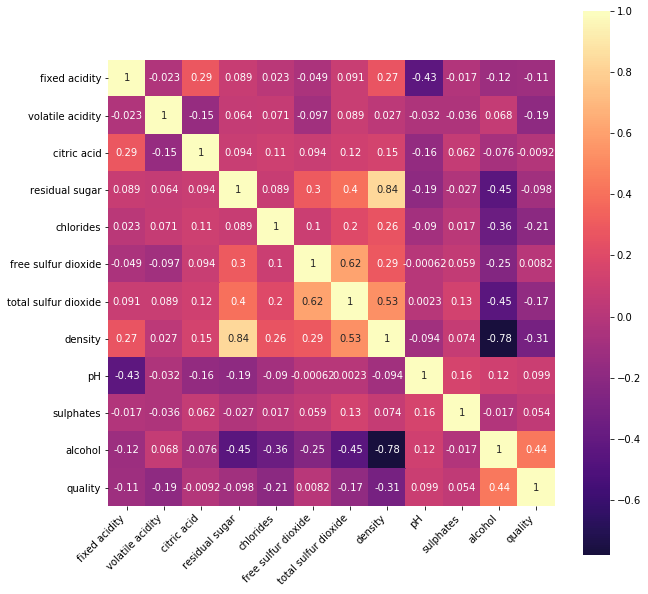

In [123]:
# Set figure size
fig = plt.subplots(figsize = (10,10))

# Using heatmap from seaborn library
ax = sns.heatmap(
    data.corr(), 
    annot = True, center=0,
    cmap = 'magma',
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

volatile acidity, citric acid, chlorides, total sulfur dioxide, density have a negative correlation with quantity. 

* fixed acidity: -0.11 negative correlation
* volatile acidity: -0.19 negative correlation
* citric acid: -0.0092 negative correlation (2nd least absolute value)
* residual sugar: -0.098 negative correlation
* chlorides: -0.21 negative correlation
* free sulfur dioxide: 0.0082 least positive correlation
* total sulfur dioxide: -0.17 negative correlation
* density: -0.31 highest negative correlation
* pH: 0.099 positive correlation
* sulphates: 0.054 positive correlation
* alcohol: 0.44 highest positive correlation

From the correlation matrix heatmap, the attribute 'alcohol' has the highest correlation with 'quality' amongst all other attributes. While 'free sulfur dioxide' is the least correlated attribute to 'quality' if considered absolute value, else it is 'density' which has the least correlation at -0.21.


# 2. Similarity

Extarcting instances with quality score as 8

In [124]:
# Extracting data where quality score is 8

q_8 = data[data['quality'] == 8]
q_8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


In [125]:
q_8.drop_duplicates(keep=False, inplace=True)
q_8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
188,6.8,0.530,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8
255,6.7,0.260,0.39,1.1,0.040,45.0,147.0,0.99350,3.32,0.58,9.6,8
280,7.0,0.240,0.36,2.8,0.034,22.0,112.0,0.99000,3.19,0.38,12.6,8
281,6.1,0.310,0.58,5.0,0.039,36.0,114.0,0.99090,3.30,0.60,12.3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


## 2.1 Calculating euclidian distance as a matrix

In [126]:
from sklearn.metrics import pairwise_distances

# Calulating pairwise distance between pairs using euclidian metric
pairwise_distances(q_8, metric='euclidean')


array([[ 0.        , 20.08432799, 25.34193128, ..., 11.95112449,
        13.41552839, 17.45226501],
       [20.08432799,  0.        , 42.68475424, ..., 18.84541903,
         9.94061082, 16.23884878],
       [25.34193128, 42.68475424,  0.        , ..., 24.9367544 ,
        33.53807307, 30.61579694],
       ...,
       [11.95112449, 18.84541903, 24.9367544 , ...,  0.        ,
         9.23478343,  7.70616958],
       [13.41552839,  9.94061082, 33.53807307, ...,  9.23478343,
         0.        ,  9.03668494],
       [17.45226501, 16.23884878, 30.61579694, ...,  7.70616958,
         9.03668494,  0.        ]])

In [127]:
q_8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
188,6.8,0.530,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8
255,6.7,0.260,0.39,1.1,0.040,45.0,147.0,0.99350,3.32,0.58,9.6,8
280,7.0,0.240,0.36,2.8,0.034,22.0,112.0,0.99000,3.19,0.38,12.6,8
281,6.1,0.310,0.58,5.0,0.039,36.0,114.0,0.99090,3.30,0.60,12.3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


In [128]:
from sklearn import preprocessing

# Scaling into [0,1]
min_max_scaler = preprocessing.MinMaxScaler()
scaled_q_8 = min_max_scaler.fit_transform(q_8)
scaled_q_8


array([[0.6744186 , 0.3255814 , 0.46666667, ..., 0.32857143, 0.36363636,
        0.        ],
       [0.6744186 , 0.95348837, 0.35      , ..., 0.45714286, 0.76363636,
        0.        ],
       [0.65116279, 0.3255814 , 0.41666667, ..., 0.47142857, 0.2       ,
        0.        ],
       ...,
       [0.11627907, 0.46511628, 0.41666667, ..., 0.15714286, 0.78181818,
        0.        ],
       [0.        , 0.24418605, 0.43333333, ..., 0.15714286, 0.78181818,
        0.        ],
       [0.44186047, 0.37209302, 0.33333333, ..., 0.11428571, 0.78181818,
        0.        ]])

In [129]:
# Calculating euclidian distance matrix after scaling the data into a scale with values between 0 and 1.

euc = pairwise_distances(scaled_q_8, metric='euclidean')
euc

array([[0.        , 0.9515927 , 0.43922479, ..., 0.92674686, 1.00884073,
        0.71020581],
       [0.9515927 , 0.        , 1.00008719, ..., 0.88925589, 1.14628425,
        0.75777789],
       [0.43922479, 1.00008719, 0.        , ..., 1.0366916 , 1.15877482,
        0.85241874],
       ...,
       [0.92674686, 0.88925589, 1.0366916 , ..., 0.        , 0.31279253,
        0.45477175],
       [1.00884073, 1.14628425, 1.15877482, ..., 0.31279253, 0.        ,
        0.62025291],
       [0.71020581, 0.75777789, 0.85241874, ..., 0.45477175, 0.62025291,
        0.        ]])

Sorting the Euclidian Distance Matrix amongst the pairs and selecting the top 10 pairs with least Euclidian Distance amongst them

In [213]:
# Append the numpy array into a list
similarity_euc = list()
size = len(euc)-1

for i in range(size):
    for j in range(i+1, size):
          similarity_euc.append((i, j, euc[i][j]))

# Sort, and extract top 10 rows with least euclidian distance
sorted_euc = sorted(similarity_euc, key=lambda e: e[2], reverse=False)
sorted_euc[:10]

[(44, 45, 0.11100925706532049),
 (60, 76, 0.12125271285414142),
 (71, 72, 0.1322568999877886),
 (70, 71, 0.18426593959832605),
 (70, 72, 0.21927643078216197),
 (3, 22, 0.2514540003892257),
 (6, 60, 0.25506760259900785),
 (32, 74, 0.25988136470072465),
 (16, 37, 0.2655259451188746),
 (86, 92, 0.27144752599766303)]

## 2.2 Calculating Cosine similarity as a matrix

In [132]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculating cosine similarity matrix
cos = cosine_similarity(q_8)
cos

array([[1.        , 0.9952501 , 0.99933189, ..., 0.99595733, 0.9958739 ,
        0.99089477],
       [0.9952501 , 1.        , 0.99608971, ..., 0.99945763, 0.99952703,
        0.99866314],
       [0.99933189, 0.99608971, 1.        , ..., 0.99731449, 0.99699176,
        0.99348345],
       ...,
       [0.99595733, 0.99945763, 0.99731449, ..., 1.        , 0.99995457,
        0.99859015],
       [0.9958739 , 0.99952703, 0.99699176, ..., 0.99995457, 1.        ,
        0.99845191],
       [0.99089477, 0.99866314, 0.99348345, ..., 0.99859015, 0.99845191,
        1.        ]])

Sorting the Cosine Similarity amongst the pairs and selecting the top 10 pairs with the highest Cosine Similarity

In [212]:
# Append the numpy array into a list
similarity_cos = list()
size = len(cos)-1

for i in range(size):
    for j in range(i+1, size):
          similarity_cos.append((i, j, cos[i][j]))

# Sort and extract top 10 rows with highest cosine similarity
sorted_cos = sorted(similarity_cos, key=lambda e: e[2], reverse=True)
sorted_cos[:10]

[(96, 97, 0.9999545660280769),
 (44, 45, 0.9999490846160789),
 (2, 36, 0.9999336085461668),
 (51, 80, 0.9999294135956859),
 (16, 34, 0.9999286955535731),
 (11, 22, 0.9999280057395366),
 (27, 38, 0.9999274402249412),
 (50, 72, 0.9999231014201756),
 (34, 37, 0.9999137685716235),
 (2, 21, 0.9999102524329487)]

## 2.3 Comparing the two similarity measures

We see that both the similarity measures produce different pairs in their top 10 lists.

Now, let's take a pair and compare the eculidian distance and cosine similarity measures.
Let us consider the pair (70, 71) which is in the top 1- of euclidian

In [241]:
print( 'Euclidian distance between the pair (44,45): ' + str([x[2] for x in sorted_euc if (x[0]==44 and x[1]==45)] ))
print( 'Cosine Similarity between the pair (44,45): ' + str([x[2] for x in sorted_cos if (x[0]==44 and x[1]==45)] ))

Euclidian distance between the pair (44,45): [0.11100925706532049]
Cosine Similarity between the pair (44,45): [0.9999490846160789]


Cosine SImilarity is better as it determines how similar the pairs are despite the difference in the vector. This is because it is increased when two vectors are in same direction, and in euclidian any distance can be large if in different directions,=.

# 3. Data Preprocessing

## 3.1 Principal Component Analysis (PCA)

Reducing 11 attributes from the data into 2-dimensional data using Principal Component Analysis (PCA)

In [174]:
import pandas as pd
from sklearn.decomposition import PCA

# Specifying number of principal components to be 2
pca = PCA(n_components = 2)
pca.fit(data)

# Project attributes
projected_components = pca.transform(data)
projected_df = pd.DataFrame(projected_components, columns=['pc1','pc2'])
final_df = pd.concat([projected_df, data[['quality']]], axis = 1)
print("2-dimensional reduced data")
final_df

2-dimensional reduced data


,pc1,pc2,quality
0,33.732172,1.240689,6
1,-11.926072,-18.955475,6
2,-41.224868,5.739181,6
3,49.086693,-1.209751,6
4,49.086693,-1.209751,6
...,...,...,...
4893,-47.882924,1.210245,6
4894,34.338545,13.149846,5
4895,-27.994480,1.986691,6
4896,-31.629111,-7.356351,7


## 3.2 Scatter Plot of the reduced 2-dimensional data

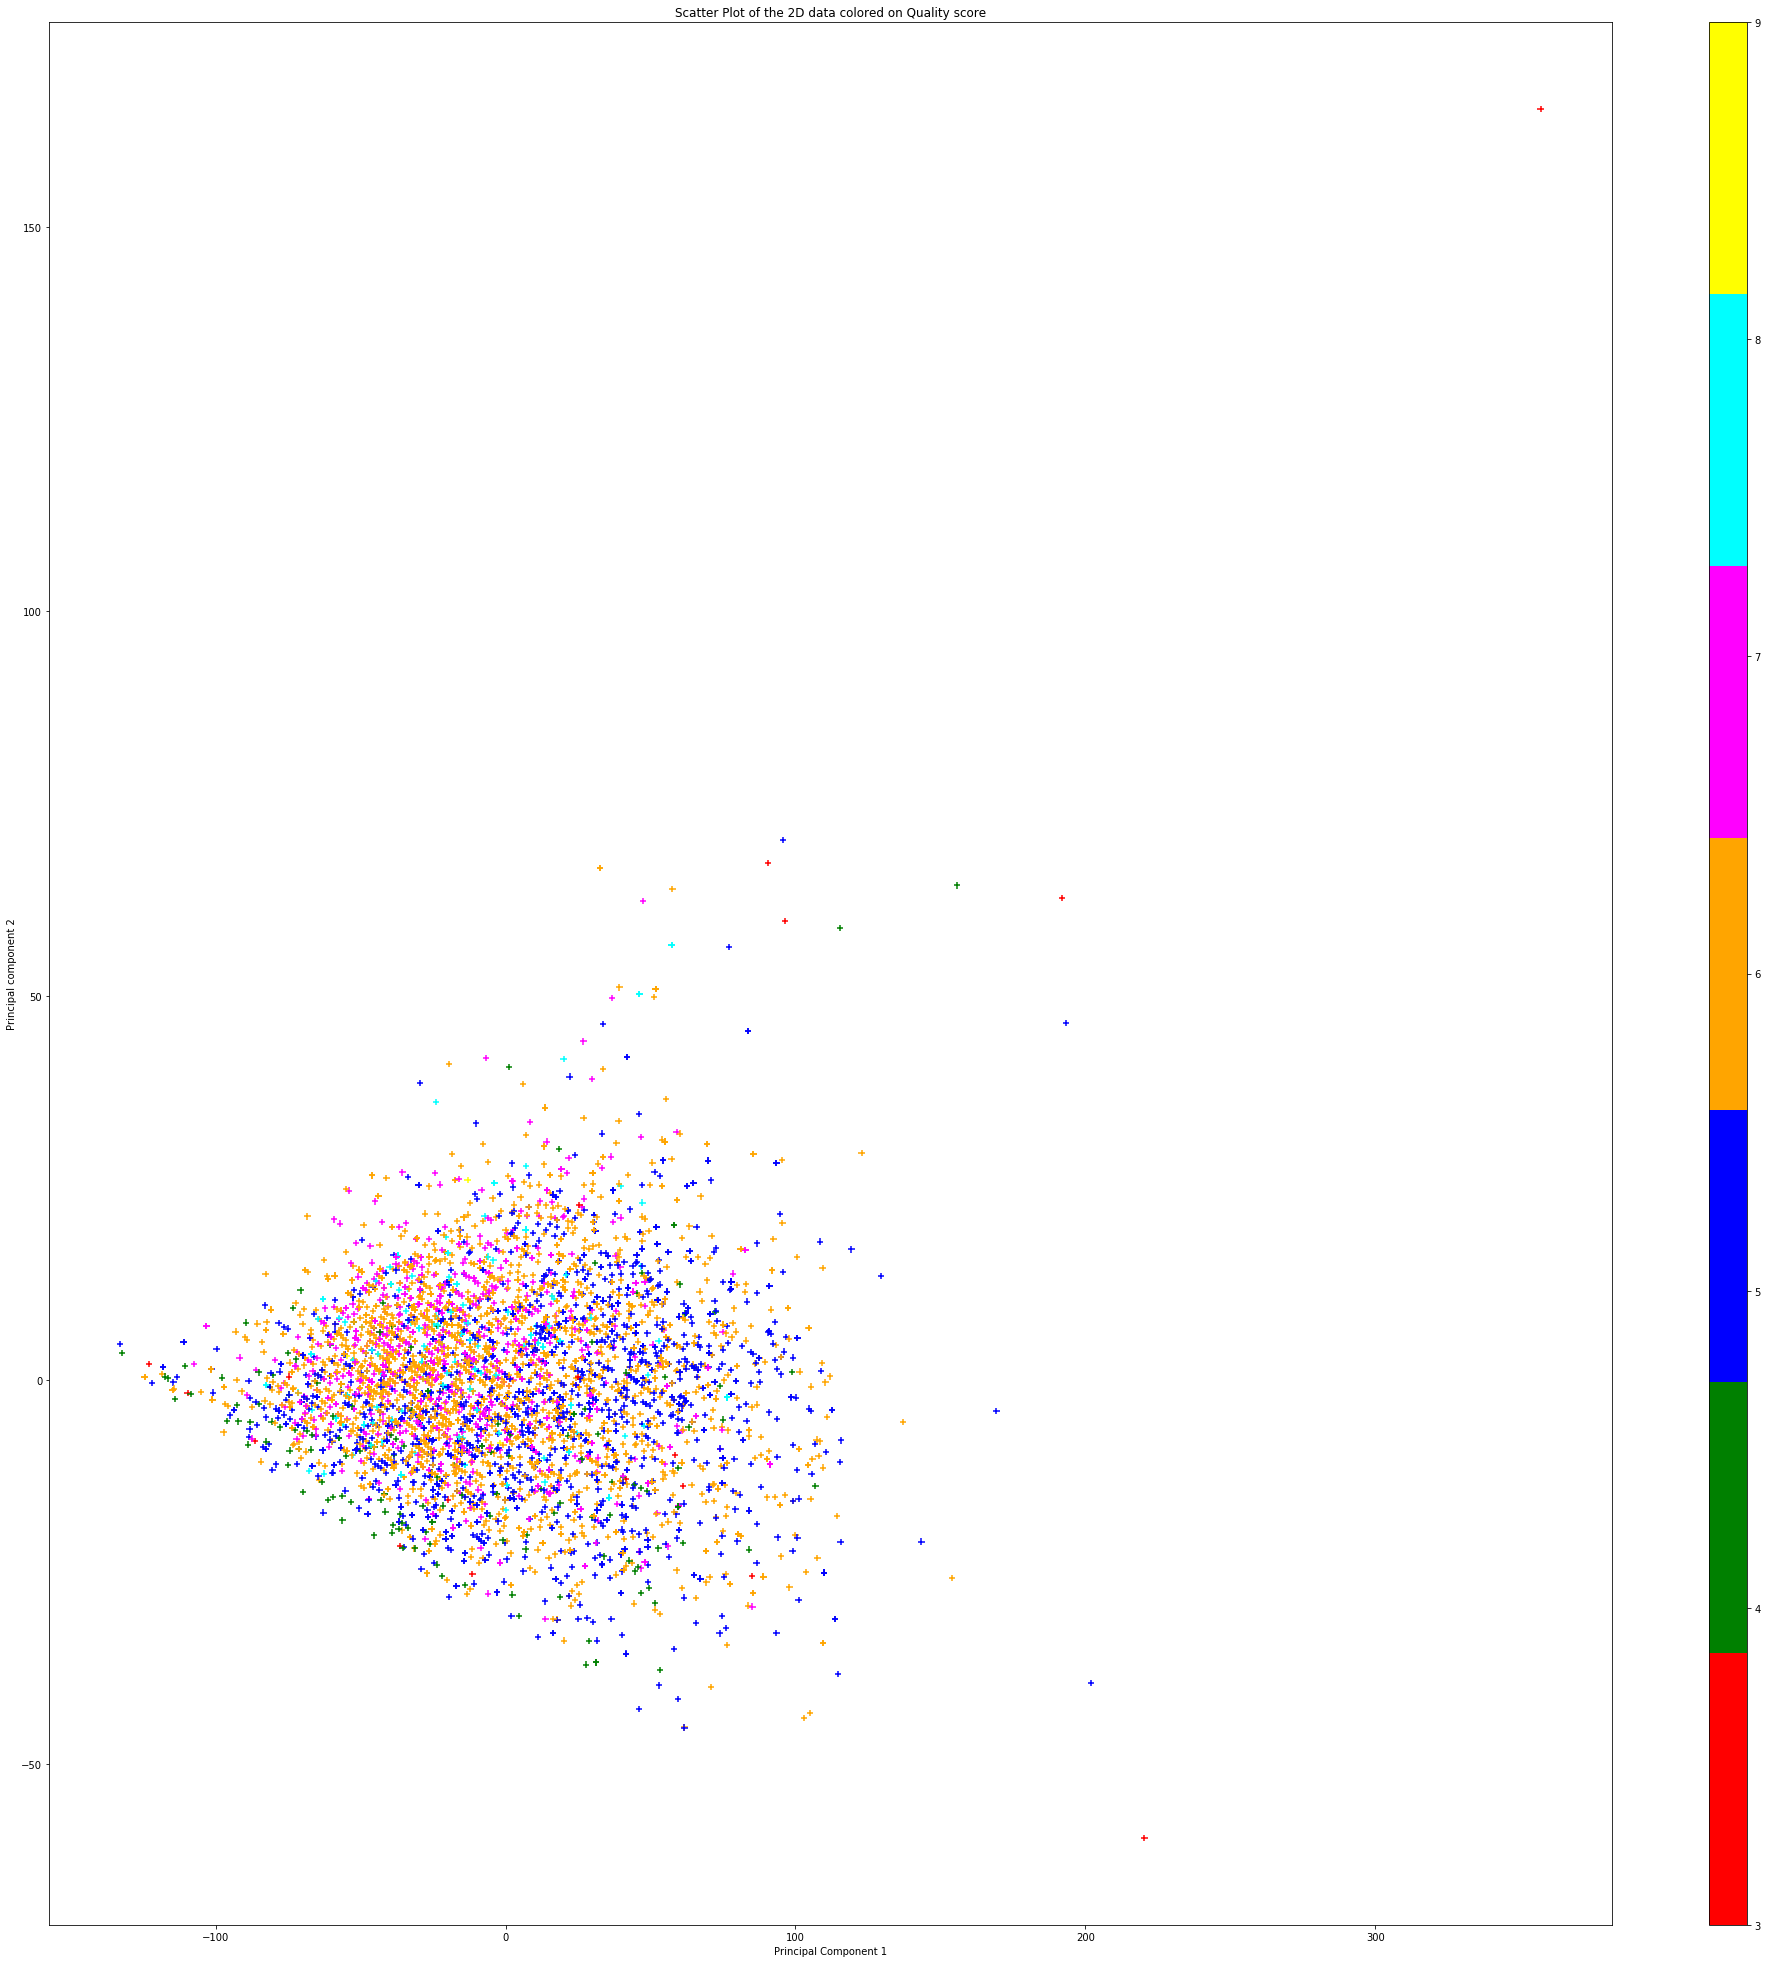

In [240]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr

# Setting plot size
plt.figure(figsize=(35,35))

# Mapping the color and markers to the values
plt.scatter(final_df['pc1'],  final_df['pc2'], marker='+', s=40, linewidths=4, c=final_df['quality'], cmap = clr.ListedColormap(['red', 'green','blue', 'orange', 'magenta', 'cyan', 'yellow']), label = quality_type) 

# Setting title, legend, labels
plt.colorbar(aspect = 50)
plt.title("Scatter Plot of the 2D data colored on Quality score")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal component 2")
plt.show()


## 3.3 Examining the scatter plot 

A large group of the data lies in one area of the plot, while some are scattered around the same.

There are a few outliers at the extremes (for example, one at top right)

There can be around 2 clusters.
* large cluster at the center upto value = 40 on pc2
* small cluster above the center, from value = 40 on pc2